<a href="https://colab.research.google.com/github/reefwn/manning-live-project/blob/main/getting-started-with-google-colab-using-tensorflow/workflow-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Start a new Notebook.

#### 2. Set the runtime environment to TPU. Go to **Runtime>Change runtime type**. Then select TPU from the dropdown menu under **hardware accelerator**.



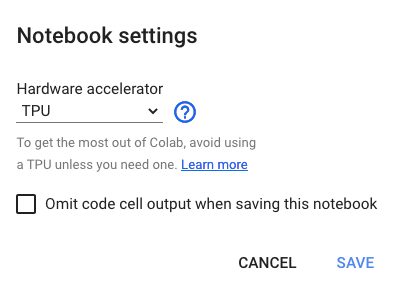

#### 3. Mount your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 4. Load the SMS Spam Collection data.

In [ ]:
import string

In [ ]:
file_prefix = '/content/drive/MyDrive/Colab Notebooks/Manning/Colab-TensorFlow'
file = '{}/SMSSpamCollection.txt'.format(file_prefix)
rows = [line.strip() for line in open(file)]

In [ ]:
category = []
text = []

for record in rows:
  cat, txt = record.split('\t')
  cleantxt = txt.lower().translate(str.maketrans('', '', string.punctuation))

  category.append(cat)
  text.append(cleantxt)

#### 5. Preprocess the data by using `keras.preprocessing` and split it into train and test sets.

In [ ]:
# preprocess the data by using keras.preprocessing
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(text)

In [ ]:
# split it into train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text, category)

In [ ]:
# convert X_train to tf.Tensor object
import numpy as np

In [ ]:
X_train_tf = tf.constant(np.asarray(X_train))
X_test_tf = tf.constant(np.asarray(X_test))

In [ ]:
X_train_tf

<tf.Tensor: shape=(4180,), dtype=string, numpy=
array([b'a lot of this sickness thing going round take it easy hope u feel better soon lol',
       b'get the official england poly ringtone or colour flag on yer mobile for tonights game text tone or flag to 84199 optout txt eng stop box39822 w111wx \xc2\xa3150',
       b'sorry i guess whenever i can get a hold of my connections maybe an hour or two ill text you',
       ...,
       b'right it wasnt you who phoned it was someone with a number like yours',
       b'hi my darlin im on my way to london and we have just been smashed into by another driver and have a big dent im really missing u what have u been up to xxx',
       b'good stuff will do'], dtype=object)>

In [ ]:
X_test_tf

<tf.Tensor: shape=(1394,), dtype=string, numpy=
array([b'normally i use to drink more water daily',
       b'ringtone club gr8 new polys direct to your mobile every week ',
       b'hi dahow is the todays class', ...,
       b'im fine babes aint been up 2 much tho saw scary movie yest its quite funny want 2mrw afternoon at town or mall or sumthinxx',
       b'i cant pick the phone right now pls send a message',
       b'go chase after her and run her over while shes crossing the street'],
      dtype=object)>

In [ ]:
# encode y_train and convert y_train to tf.Tensor object
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
y_train_tf = tf.constant(le.fit_transform(y_train))
y_test_tf = tf.constant(le.fit_transform(y_test))

In [ ]:
y_train_tf, y_test_tf

(<tf.Tensor: shape=(4180,), dtype=int64, numpy=array([0, 1, 0, ..., 0, 0, 0])>,
 <tf.Tensor: shape=(1394,), dtype=int64, numpy=array([0, 1, 0, ..., 0, 0, 0])>)

#### 6. Build a simple classifier either with TensorFlow or with Keras. If you are not familiar with TensorFlow and/or neural networks, simply follow the steps described in one of the classification tutorials at the official TF Guides (see resources).

In [ ]:
import tensorflow_hub as hub

In [ ]:
embedding = 'https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### 8. Use a callback function to save a checkpoint. Save the checkpoints to your Google Drive. If you get stuck, feel free to check our reference implementation!

In [ ]:
# callback function to save a checkpoint
path = '{}/checkpoints/'.format(file_prefix)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#### 7. Train your network by using the training data. Use at least 10 epochs. You can use even more. The more you use, the better it is.

In [ ]:
# train your network by using the training data, use at least 10 epochs
history = model.fit(X_train_tf, y_train_tf,
                    epochs=20,
                    validation_data=(X_test_tf, y_test_tf),
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
131/131 [==============================] - 65s 489ms/step - loss: 0.3416 - accuracy: 0.8758 - val_loss: 0.1600 - val_accuracy: 0.9405
Epoch 2/20
131/131 [==============================] - 65s 493ms/step - loss: 0.1021 - accuracy: 0.9730 - val_loss: 0.0844 - val_accuracy: 0.9813
Epoch 3/20
131/131 [==============================] - 64s 492ms/step - loss: 0.0455 - accuracy: 0.9888 - val_loss: 0.0716 - val_accuracy: 0.9842
Epoch 4/20
131/131 [==============================] - 65s 493ms/step - loss: 0.0235 - accuracy: 0.9943 - val_loss: 0.0697 - val_accuracy: 0.9842
Epoch 5/20
131/131 [==============================] - 63s 482ms/step - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.0709 - val_accuracy: 0.9849
Epoch 6/20
131/131 [==============================] - 64s 492ms/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0734 - val_accuracy: 0.9849
Epoch 7/20
131/131 [==============================] - 62s 476ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0763 - val_ac

#### 9. Run the model on your test data and evaluate your model.

In [ ]:
results = model.evaluate(X_test_tf, y_test_tf, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

44/44 - 0s - loss: 0.1007 - accuracy: 0.9849
loss: 0.101
accuracy: 0.985


#### 10. Save your model into your Google Drive folder.

In [ ]:
model.save('{}/TensorFlow_model'.format(file_prefix))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Manning/Colab-TensorFlow/TensorFlow_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Manning/Colab-TensorFlow/TensorFlow_model/assets


##### References:
1. https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
2. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint